<a href="https://colab.research.google.com/github/Farmhouse121/Adventures-in-Financial-Data-Science/blob/main/Find_Correlated_Stocks_for_the_NASDAQ_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Installing yfinance and getting data...")
!pip install yfinance 1>/dev/null
import pandas as pd
import numpy as np
from yfinance import download
from datetime import datetime

# set time frame of analysis
today=datetime.now()
start_year=today.year-3

# this list as of 2020-12-21 https://www.nasdaq.com/press-release/annual-changes-to-the-nasdaq-100-index-2020-12-11
# you must use Adjusted Close to account for distributions such as dividends and splits, not simple Close 
prices=download(['AAPL','ADBE','ADI','ADP','ADSK','AEP','ALGN','AMAT','AMD','AMGN','AMZN','ANSS','ASML','ATVI','AVGO','BIDU','BIIB','BKNG','CDNS','CDW','CERN','CHKP','CHTR',
                 'CMCSA','COST','CPRT','CRWD','CSCO','CSX','CTAS','CTSH','DLTR','DOCU','DXCM','EA','EBAY','EXC','FAST','FB','FISV','FOXA','GILD','GOOG','GOOGL','HON','IDXX',
                 'ILMN','INCY','INTC','INTU','ISRG','JD','KDP','KHC','KLAC','LRCX','LULU','MAR','MCHP','MDLZ','MELI','MNST','MRNA','MRVL','MSFT','MTCH','MU','NFLX','NTES',
                 'NVDA','NXPI','OKTA','ORLY','PAYX','PCAR','PDD','PEP','PTON','PYPL','QCOM','REGN','ROST','SBUX','SGEN','SIRI','SNPS','SPLK','SWKS','TCOM','TEAM','TMUS',
                 'TSLA','TXN','VRSK','VRSN','VRTX','WBA','WDAY','XEL','XLNX','ZM'],"%d-01-01" % start_year,today.strftime("%Y-%m-%d"))["Adj Close"] 

prices.index=pd.DatetimeIndex(prices.index).to_period('D') # this is to make sure the index is properly time aware
prices

Installing yfinance and getting data...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
[*********************100%***********************]  101 of 101 completed


,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,38.277531,224.570007,80.739853,122.168961,128.960007,65.485153,202.119995,32.152931,18.830000,174.294479,...,62.023998,86.622742,106.568657,147.759995,164.080002,60.238846,159.740005,44.487858,84.049446,NaN
2019-01-03,34.464802,215.699997,75.862755,118.479683,121.849998,65.332497,184.779999,30.289837,17.049999,171.642395,...,60.071999,81.514343,103.312256,142.589996,163.729996,59.610237,154.020004,44.312557,80.884888,NaN
2019-01-04,35.936077,226.190002,77.704597,123.201614,128.279999,65.934044,186.710007,32.364216,19.000000,177.509720,...,63.537998,85.201195,107.873192,148.970001,172.699997,61.593418,163.350006,44.746178,84.630096,NaN
2019-01-07,35.856094,229.259995,78.193245,122.535088,132.720001,65.565941,189.919998,32.940434,20.570000,179.898438,...,66.991997,86.668610,107.981079,151.399994,175.850006,61.947548,163.500000,44.552437,86.865608,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,165.119995,467.679993,160.289993,204.440002,220.229996,90.650002,511.459991,134.199997,123.339996,226.479996,...,870.429993,169.990005,177.339996,213.720001,230.020004,46.090000,229.050003,67.330002,NaN,132.600006
2022-03-01,163.199997,466.679993,156.949997,202.309998,214.000000,90.209999,500.970001,129.610001,113.830002,225.210007,...,864.369995,167.289993,179.360001,216.039993,230.690002,45.009998,240.330002,66.510002,NaN,122.779999
2022-03-02,166.559998,471.179993,159.820007,206.289993,216.509995,91.239998,496.140015,133.179993,118.279999,228.589996,...,879.890015,170.100006,181.729996,217.850006,234.110001,46.150002,248.389999,67.559998,NaN,121.610001


In [2]:
# make returns
returns=pd.DataFrame({ticker:prices[ticker]/prices[ticker].shift()*1e2-1e2 for ticker in list(prices)})
returns

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-9.960749,-3.949775,-6.040509,-3.019816,-5.513344,-0.233116,-8.579060,-5.794477,-9.453004,-1.521611,...,-3.147168,-5.897295,-3.055684,-3.498916,-0.213314,-1.043527,-3.580819,-0.394041,-3.765115,NaN
2019-01-04,4.268921,4.863239,2.427862,3.985436,5.276980,0.920747,1.044490,6.848432,11.436955,3.418342,...,5.769742,4.522948,4.414710,4.474371,5.478533,3.326913,6.057656,0.978550,4.630295,NaN
2019-01-07,-0.222570,1.357262,0.628853,-0.541005,3.461181,-0.558290,1.719239,1.780416,8.263156,1.345683,...,5.436115,1.722294,0.100013,1.631196,1.823978,0.574947,0.091824,-0.432977,2.641509,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,0.163779,0.459678,-1.128795,0.039147,0.277753,1.330206,-0.214610,-1.119956,1.883363,-0.242260,...,7.477743,-0.485893,-1.225352,-0.219432,-0.121580,-0.238097,1.696047,0.148741,NaN,5.809134
2022-03-01,-1.162790,-0.213821,-2.083721,-1.041873,-2.828859,-0.485386,-2.050989,-3.420266,-7.710390,-0.560751,...,-0.696207,-1.588336,1.139057,1.085529,0.291278,-2.343245,4.924688,-1.217882,NaN,-7.405737
2022-03-02,2.058824,0.964258,1.828614,1.967276,1.172895,1.141779,-0.964127,2.754411,3.909336,1.500817,...,1.795530,1.679726,1.321362,0.837814,1.482508,2.532778,3.353721,1.578703,NaN,-0.952922


,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM
AAPL,1.000000,0.685102,0.611433,0.561655,0.597637,0.346973,0.460719,0.603677,0.571382,0.484952,...,0.449771,0.649378,0.572160,0.640433,0.433774,0.325726,0.504055,0.418197,0.514147,0.182426
ADBE,0.685102,1.000000,0.630942,0.561388,0.715117,0.292083,0.441020,0.596272,0.573913,0.449843,...,0.448653,0.639030,0.590892,0.708384,0.469874,0.225974,0.674681,0.374323,0.555905,0.314607
ADI,0.611433,0.630942,1.000000,0.576086,0.621553,0.271177,0.516586,0.782752,0.578912,0.443938,...,0.414760,0.854331,0.548977,0.622047,0.393441,0.323122,0.508496,0.367021,0.680510,0.095754
ADP,0.561655,0.561388,0.576086,1.000000,0.562361,0.529337,0.518325,0.552008,0.415848,0.510301,...,0.306810,0.611423,0.657725,0.639255,0.419964,0.428074,0.484024,0.573197,0.427387,-0.013586
ADSK,0.597637,0.715117,0.621553,0.562361,1.000000,0.270305,0.521845,0.614007,0.534429,0.375687,...,0.418829,0.625648,0.506688,0.589527,0.406446,0.316128,0.618453,0.325281,0.533030,0.257155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.325726,0.225974,0.323122,0.428074,0.316128,0.358979,0.284978,0.356753,0.235462,0.388369,...,0.131474,0.385053,0.298094,0.283169,0.250362,1.000000,0.145705,0.314571,0.274535,-0.121609
WDAY,0.504055,0.674681,0.508496,0.484024,0.618453,0.219432,0.399384,0.513165,0.479300,0.282239,...,0.395344,0.499629,0.475283,0.541389,0.323290,0.145705,1.000000,0.264707,0.448530,0.274391
XEL,0.418197,0.374323,0.367021,0.573197,0.325281,0.836399,0.310283,0.324480,0.234094,0.493010,...,0.136808,0.393017,0.630608,0.528959,0.361303,0.314571,0.264707,1.000000,0.200750,-0.045926
XLNX,0.514147,0.555905,0.680510,0.427387,0.533030,0.153486,0.412918,0.669205,0.644691,0.301363,...,0.367316,0.716817,0.424289,0.509730,0.329968,0.274535,0.448530,0.200750,1.000000,0.139387


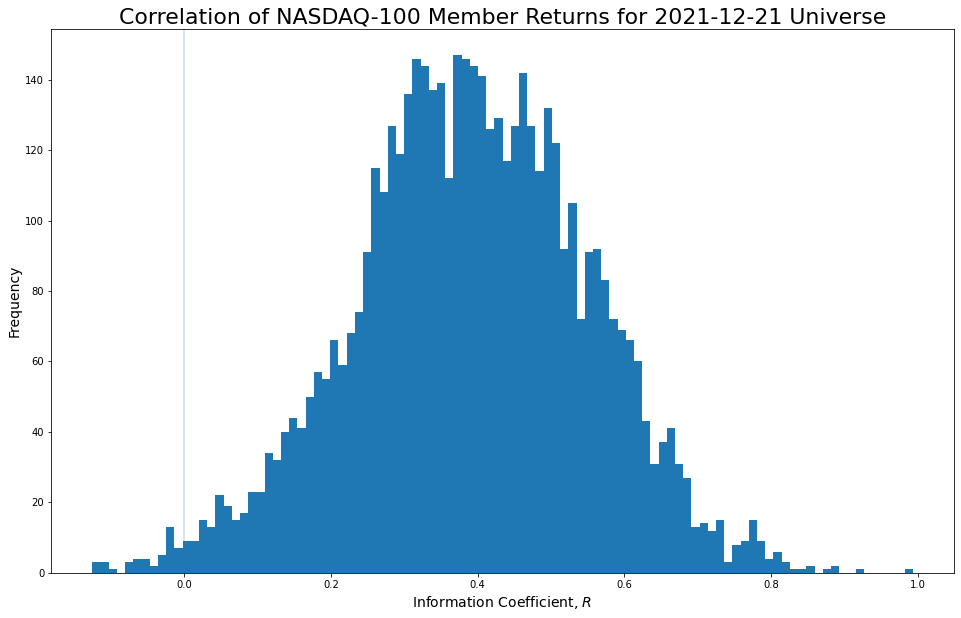

In [11]:
# compute correlation matrix
rho=returns.corr(method='pearson',min_periods=10)
display(rho)

for row in range(rho.shape[0]):
    for column in range(row,rho.shape[0]):
        rho.iloc[row,column]=np.nan # to get rid of the diagonal and upper right triangle

rho["LeftTicker"]=rho.index
rhov=rho.melt(id_vars='LeftTicker',var_name='RightTicker',value_name='Correlation').dropna()
rhov=rhov[(rhov["LeftTicker"]!="Ticker")&(rhov["RightTicker"]!="Ticker")]

# make a histogram
from matplotlib import pyplot as pl ; GoldenRatio=(1e0+np.sqrt(5e0))/2e0
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
rhov["Correlation"].hist(ax=plot,bins=np.linspace(rhov["Correlation"].min(),rhov["Correlation"].max(),101))
plot.grid(None)
plot.set_title("Correlation of NASDAQ-100 Member Returns for 2021-12-21 Universe",fontsize=22)
plot.set_xlabel("Information Coefficient, $R$",fontsize=14)
plot.set_ylabel("Frequency",fontsize=14)
plot.axvline(alpha=0.25)

# collapse the dataframe
rhov.index=rhov["LeftTicker"]+","+rhov["RightTicker"]
rhov.drop(["LeftTicker","RightTicker"],axis=1,inplace=True)
rhov.sort_values("Correlation",inplace=True)

Processing (ZM,INTC) with correlation 0.0907623.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                   INTC   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.005
Date:                Mon, 07 Mar 2022   Prob (F-statistic):             0.0145
Time:                        17:31:49   Log-Likelihood:                -1693.2
No. Observations:                 725   AIC:                             3390.
Df Residuals:                     723   BIC:                             3399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0064      0.093      0.069      0.9

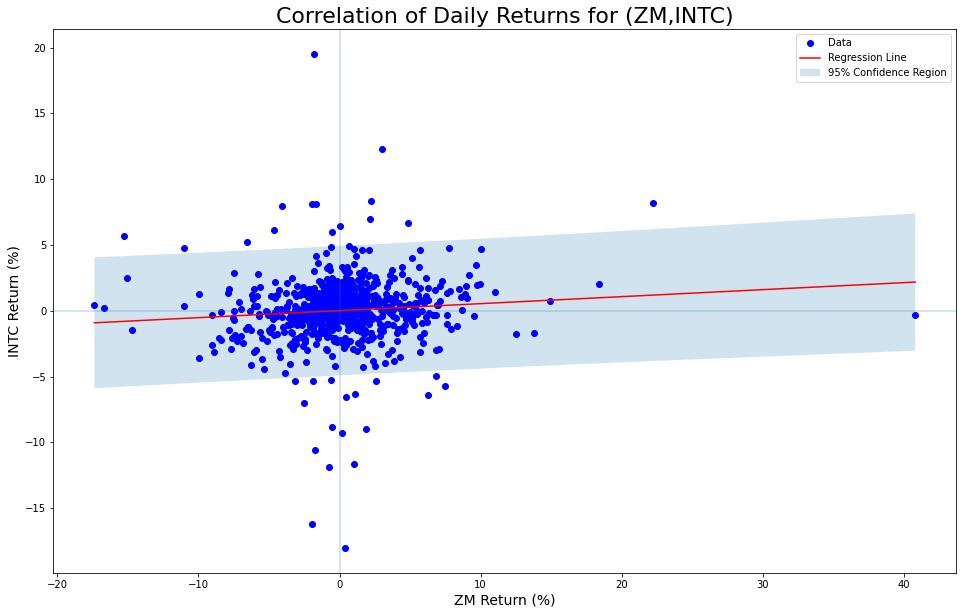

In [4]:
# select a suitable data pair
np.random.seed(123456) # set the seed to guarantee reproducability
pair=np.random.choice(rhov.index[(rhov["Correlation"]>=0.09e0)&(rhov["Correlation"]<=0.11e0)])
x_name,y_name=pair.split(",")
print("Processing (%s) with correlation %g." % (pair,rhov.loc[pair,"Correlation"]))
data=pd.DataFrame({k:returns[k] for k in pair.split(',')}).dropna()

# linear regression
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
alpha=0.05 # set alpha_critical to 5%
fit=ols("%s ~ %s" % (y_name,x_name),data).fit() # do OLS regression
data['model']=fit.fittedvalues # get the fit
print(fit.summary()) # print the regression summary

x,y,yhat=tuple(map(lambda c:data[c].tolist(),(x_name,y_name,"model")))
sig,crl,cru,=wls_prediction_std(fit,alpha=alpha) # get the confidence regions with given alpha
x,y,yhat,crl,cru=tuple(zip(*list(sorted(zip(x,y,yhat,crl,cru),key=lambda a:a[0])))) # sort all values by x

# make scatter plot
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
plot.plot(x,y,'bo',label='Data')
plot.plot(x,yhat,'r-',label='Regression Line')
plot.fill_between(x,crl,cru,alpha=0.2,label='%.0f%% Confidence Region' % (1e2-1e2*alpha))
plot.set_title("Correlation of Daily Returns for (%s)" % pair,fontsize=22)
plot.axhline(alpha=0.25)
plot.axvline(alpha=0.25)
plot.set_xlabel("%s Return (%%)" % x_name,fontsize=14)
plot.set_ylabel("%s Return (%%)" % y_name,fontsize=14)
plot.legend();

Varying trade entry barrier over range [0,3].


  0%|          | 0/151 [00:00<?, ?it/s]

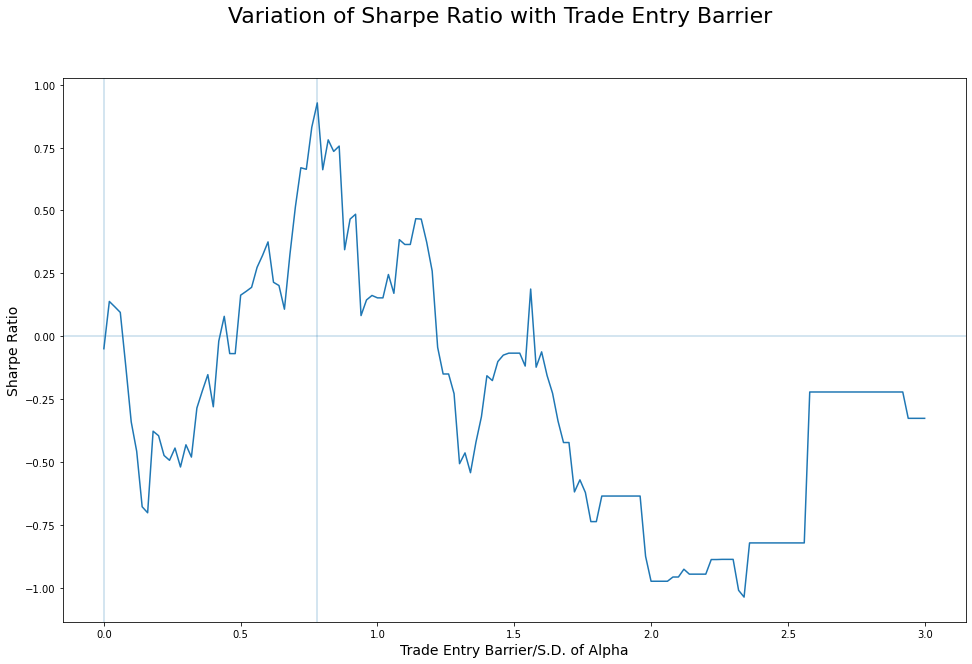

In [9]:
# barrier scan
alpha_sd=data[x_name].std()

from tqdm.notebook import tqdm
trials=np.linspace(0e0,3e0,151)
sharpe=pd.DataFrame({"Barrier":trials,"Sharpe":[np.nan]*trials.shape[0]}).set_index("Barrier")
print("Varying trade entry barrier over range [%g,%d]." % (trials[0],trials[-1]))

for barrier in tqdm(sharpe.index):
    scan=data[[x_name,y_name]].copy() # take a copy of the returns 
    scan["alpha_std"]=scan[x_name]/alpha_sd
    scan.loc[scan.index[0],"holding"]=0e0

    for i,date in enumerate(scan.index[1:]):
        scan.loc[date,"holding"]=np.sign(scan.loc[date,"alpha_std"]) if abs(scan.loc[date,"alpha_std"])>=barrier else scan.loc[scan.index[i],"holding"]

    scan["prior_holding"]=scan["holding"].shift()
    scan["pnl"]=scan["prior_holding"]*scan[y_name]
    sharpe.loc[barrier,"Sharpe"]=scan["pnl"].mean()/scan["pnl"].std()*np.sqrt(252e0)

barrier=sharpe.index[sharpe["Sharpe"].argmax()]

figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
sharpe.plot(ax=plot)
plot.axhline(alpha=0.25)
plot.axvline(alpha=0.25)
plot.axvline(barrier,alpha=0.25)
plot.set_xlabel("Trade Entry Barrier/S.D. of Alpha",fontsize=14)
plot.set_ylabel("Sharpe Ratio",fontsize=14)
figure.suptitle("Variation of Sharpe Ratio with Trade Entry Barrier",fontsize=22)
plot.get_legend().remove();

Simulate barrier trading of INTC with entry barrier at ±0.78 times the s.d. of the alpha, which is 4.28357.
With zero costs, trading has a Sharpe Ratio of 0.926627.


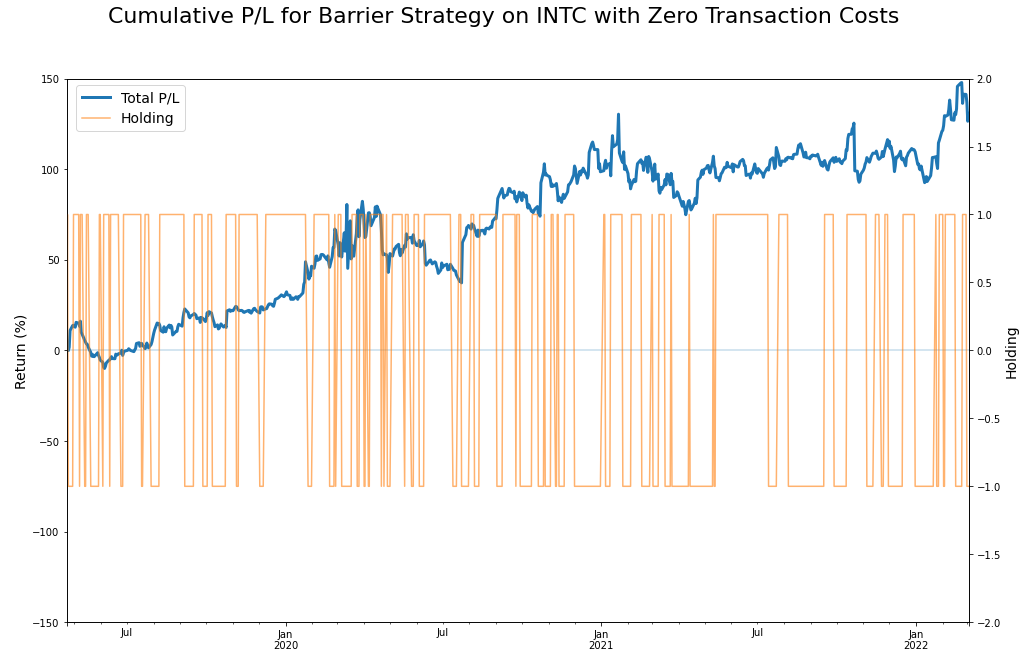

In [8]:
# simulate barrier trading with barrier at B sigma of alpha
print("Simulate barrier trading of %s with entry barrier at ±%g times the s.d. of the alpha, which is %g." % (y_name,barrier,alpha_sd))

data["alpha_std"]=data[x_name]/alpha_sd
data.loc[data.index[0],"holding"]=0e0

for i,date in enumerate(data.index[1:]): # starts on day #2, data.index[i] is the prior day!
    data.loc[date,"holding"]=np.sign(data.loc[date,"alpha_std"]) if abs(data.loc[date,"alpha_std"])>=barrier else data.loc[data.index[i],"holding"]

data["prior_holding"]=data["holding"].shift()
data.loc[data.index[0],"prior_holding"]=0e0
data["trade"]=data["holding"]-data["prior_holding"]
data["pnl"]=data["prior_holding"]*data[y_name]
print("With zero costs, trading has a Sharpe Ratio of %g." % (data["pnl"].mean()/data["pnl"].std()*np.sqrt(252e0)))

# make cumulative p/l curve using the log trick
data["total_pnl"]=np.exp(np.log(1e0+data["pnl"]/1e2).cumsum())*1e2-1e2
plots=list(pl.subplots(figsize=(10*GoldenRatio,10))) # plots[0] is the figure
data["total_pnl"].plot(ax=plots[1],label="Total P/L",color="C0",lw=3)
plots[1].set_xlabel(None)
plots[1].set_ylabel("Return (%)",fontsize=14)
plots[1].axhline(alpha=0.25)
plots[1].set_ylim(-150,150)

# make a second axis
plots.append(plots[1].twinx())
data["holding"].plot(ax=plots[2],label="Holding",color="C1",alpha=0.6)
plots[2].set_ylim(-2,2)
plots[2].set_ylabel("Holding",fontsize=14)

# decorate figure
plots[0].suptitle("Cumulative P/L for Barrier Strategy on %s with Zero Transaction Costs" % y_name,fontsize=22)
plots[0].legend(loc=(0.074,0.80),fontsize=14);